## Student Performance Indicator


#### Machine learning Project Steps

- Understand the Problem Statement
- Data Collection
- Analyzing the Data
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Select best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv') # Import CSV Data as Pandas DataFrame
df.head() # top 5 records

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape # shape of the dataset

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race_ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Analyzing the Data

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [10]:
df.isna().sum() # check missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

In [11]:
df.duplicated().sum() # check duplicates

0

There are no duplicate values in the dataset

In [12]:
df.info() # check null and Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique() # check number of unique values in dataset

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
df.describe() # check statistics of dataset

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are in between 66 and 68.05;
- All standard deviations are between 14.6 and 15.19;
- While there is a minimum score 0 for math, for reading minimum is 17 and for writing minimum is 10

### Exploring the data

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
print("Categories in 'gender' variable:  ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:  ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:  ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:  ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race_ethnicity' variable:  
['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  
['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  
['none' 'completed']


In [30]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype!= 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype== 'O']

print("There are {} numeric features: {}".format((len(numeric_features)), numeric_features))
print("There are {} categorical features: {}".format((len(categorical_features)), categorical_features))

There are 3 numeric features: ['math_score', 'reading_score', 'writing_score']
There are 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [196]:
#Adding columns for "Total Score" and "Average"

df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score'] /3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [55]:
# Getting students with full marks 
## Logic 1
def full_marks(num_feature):
    for feature in num_feature:
        cnt = 0
        for score in df[feature]:
            if score==100:
                cnt = cnt+1
        print("Number of students with full marks in {}: {}".format(feature,cnt))
full_marks(numeric_features)
## Logic 2
math_full = df[df['math_score'] == 100]['math_score'].count()
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
writing_full = df[df['writing_score'] == 100]['writing_score'].count()
print("\n")
print("Number of students with full marks in Maths: ",math_full)
print("Number of students with full marks in Reading: ",reading_full)
print("Number of students with full marks in Writing: ",writing_full)

Number of students with full marks in math_score: 7
Number of students with full marks in reading_score: 17
Number of students with full marks in writing_score: 14


Number of students with full marks in Maths:  7
Number of students with full marks in Reading:  17
Number of students with full marks in Writing:  14


In [57]:
math_less_20 = df[df['math_score'] < 25]['math_score'].count()
reading_less_20 = df[df['reading_score'] < 25]['reading_score'].count()
writing_less_20 = df[df['writing_score'] < 25]['writing_score'].count()
print("\n")
print("Number of students with less than 25 marks in Maths: ",math_less_20)
print("Number of students with less than 25 marks in Reading: ",reading_less_20)
print("Number of students with less than 25 marks in Writing: ",writing_less_20)



Number of students with less than 25 marks in Maths:  7
Number of students with less than 25 marks in Reading:  4
Number of students with less than 25 marks in Writing:  5


##### Insight
- Students has performed best in Reading

### 4. Data Visualization
#### 4.1 Visualize average score distribution
- Histogram
- Kernel Distribution Function (KDE)

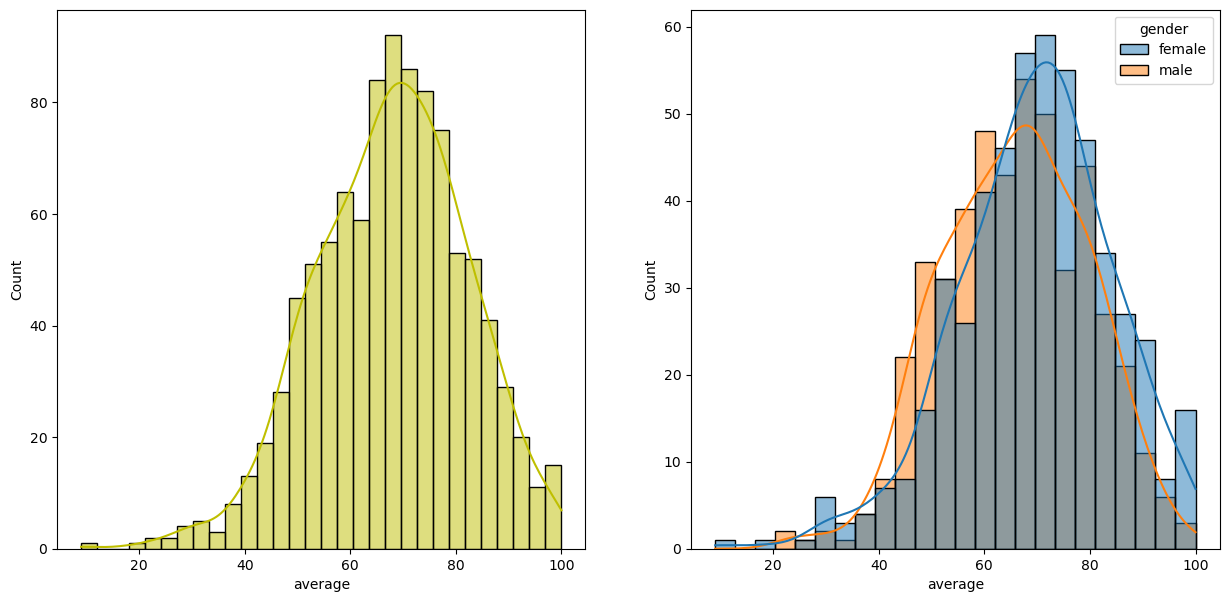

In [89]:
fig, axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1) # figure has 1 row, 2 columns, and this plot is the first plot.
sns.histplot(data = df,x='average',bins = 30,kde=True,color='y')
plt.subplot(1,2,2)
sns.histplot(data = df, x='average', kde = True,hue = 'gender')
plt.show()

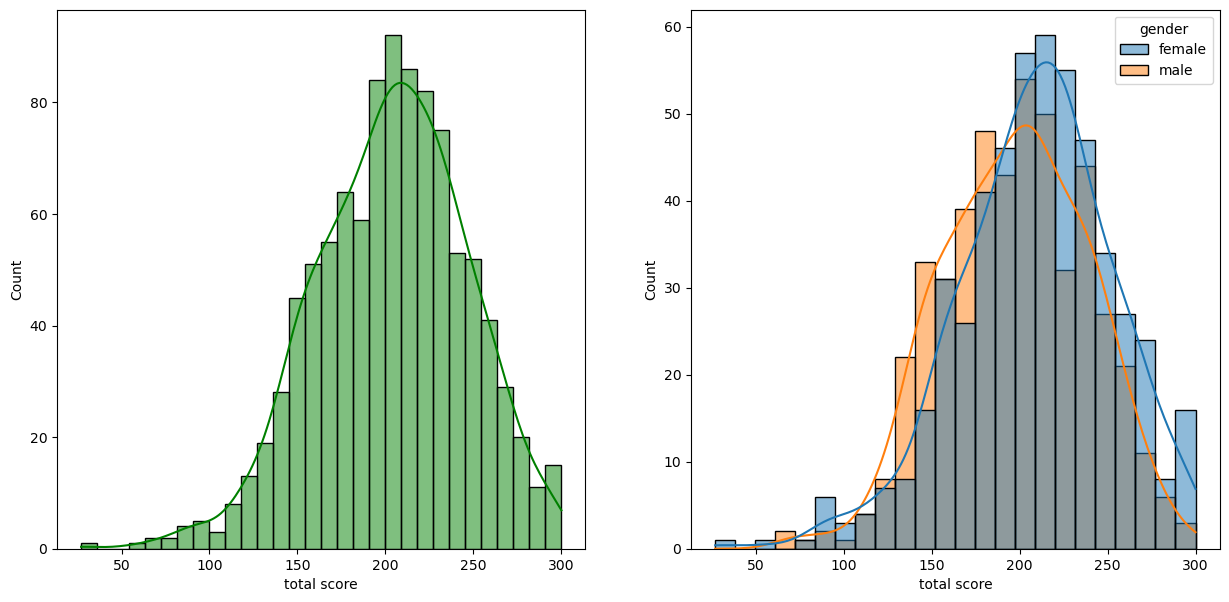

In [95]:
fig, axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1) # the figure has 1 row, 2 columns, and this plot is the first plot.
sns.histplot(data = df,x='total score',bins = 30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data = df, x='total score', kde = True,hue = 'gender')
plt.show()

#####  Insights
- Female students perform well than male students.

<AxesSubplot:xlabel='average', ylabel='Count'>

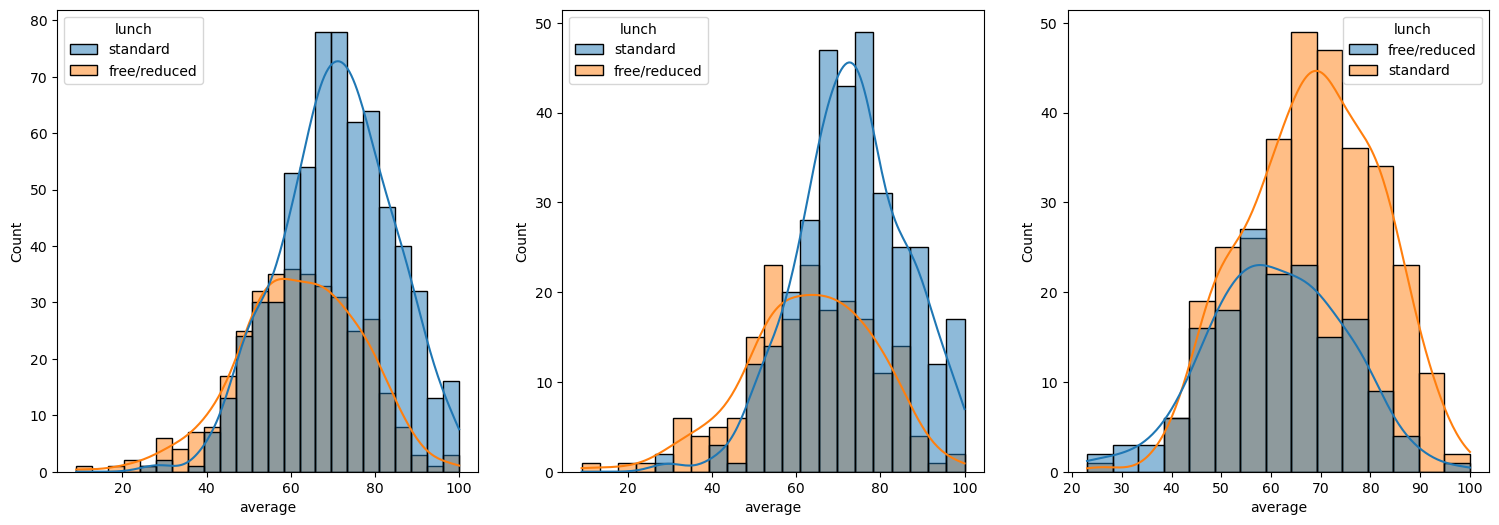

In [100]:
fig, axis = plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df, x = 'average',kde=True,hue='lunch')
plt.subplot(1,4,2)
sns.histplot(data=df[df.gender=='female'], x = 'average',kde=True,hue='lunch')
plt.subplot(1,4,3)
sns.histplot(data=df[df.gender=='male'], x = 'average',kde=True,hue='lunch')

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams irrespective of the gender.

<AxesSubplot:xlabel='average', ylabel='Count'>

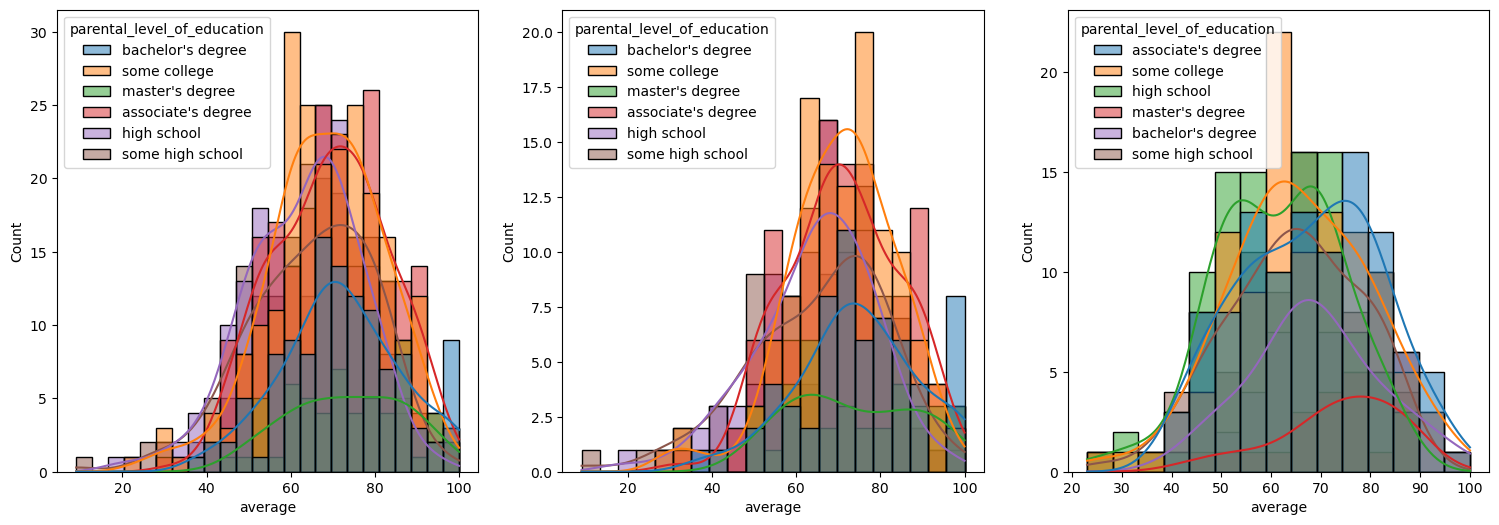

In [101]:
fig, axis = plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df, x = 'average',kde=True,hue='parental_level_of_education')
plt.subplot(1,4,2)
sns.histplot(data=df[df.gender=='female'], x = 'average',kde=True,hue='parental_level_of_education')
plt.subplot(1,4,3)
sns.histplot(data=df[df.gender=='male'], x = 'average',kde=True,hue='parental_level_of_education')

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their female child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on male students.

<AxesSubplot:xlabel='average', ylabel='Count'>

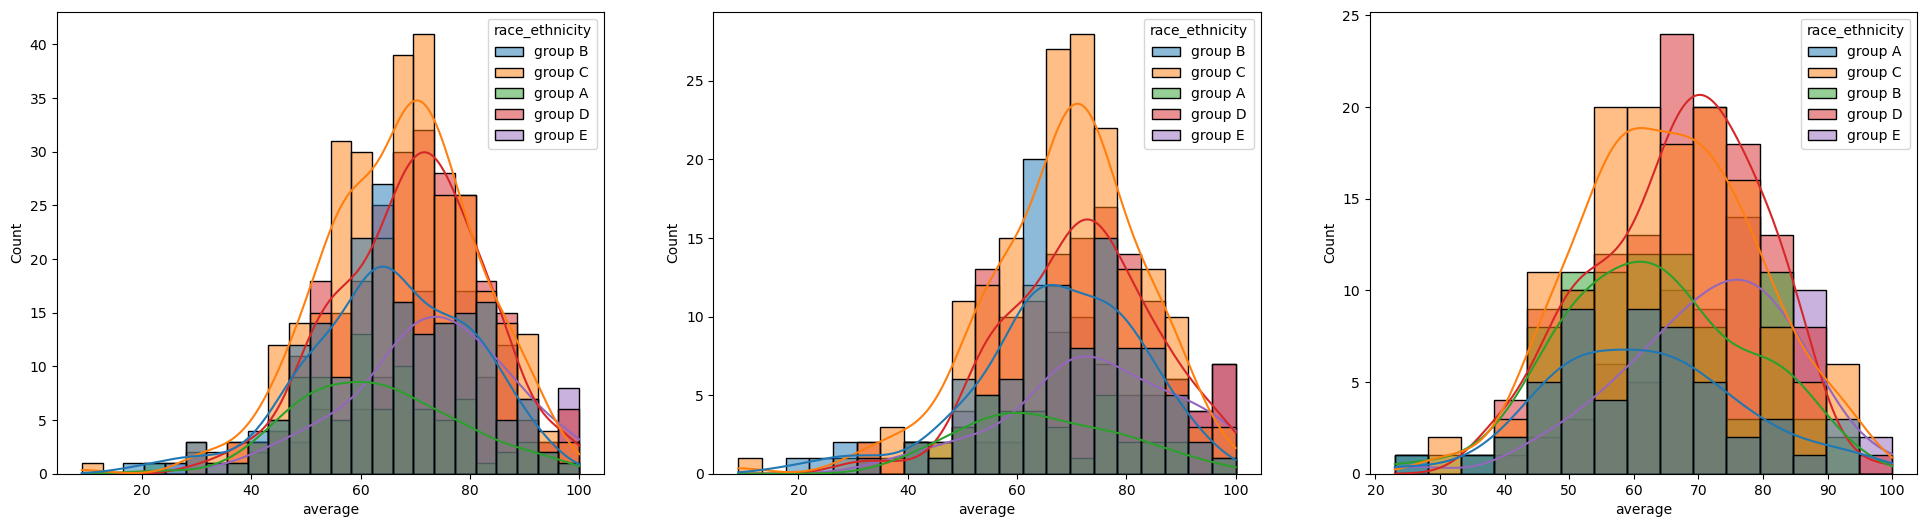

In [103]:
plt.subplots(1,3,figsize=(24,6))
plt.subplot(1,3, 1 ) # the figure has 1 row, 3 columns, and this plot is the first plot.
sns.histplot(data=df, x='average',kde=True,hue='race_ethnicity')
plt.subplot(1,3, 2 ) # the figure has 1 row, 3 columns, and this plot is the second plot.
sns.histplot(data=df[df.gender=='female'], x='average',kde=True,hue='race_ethnicity')
plt.subplot(1,3, 3 ) # the figure has 1 row, 3 columns, and this plot is the third plot.
sns.histplot(data=df[df.gender=='male'], x='average',kde=True,hue='race_ethnicity')

#####  Insights
- Students of group C performs well in exam as compared to group A and group B.
- Female students of group C performs well in exam as compared to male students.
- Students of group A and group B tends to perform poor in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

<AxesSubplot:title={'center':'Writing Score'}, ylabel='writing_score'>

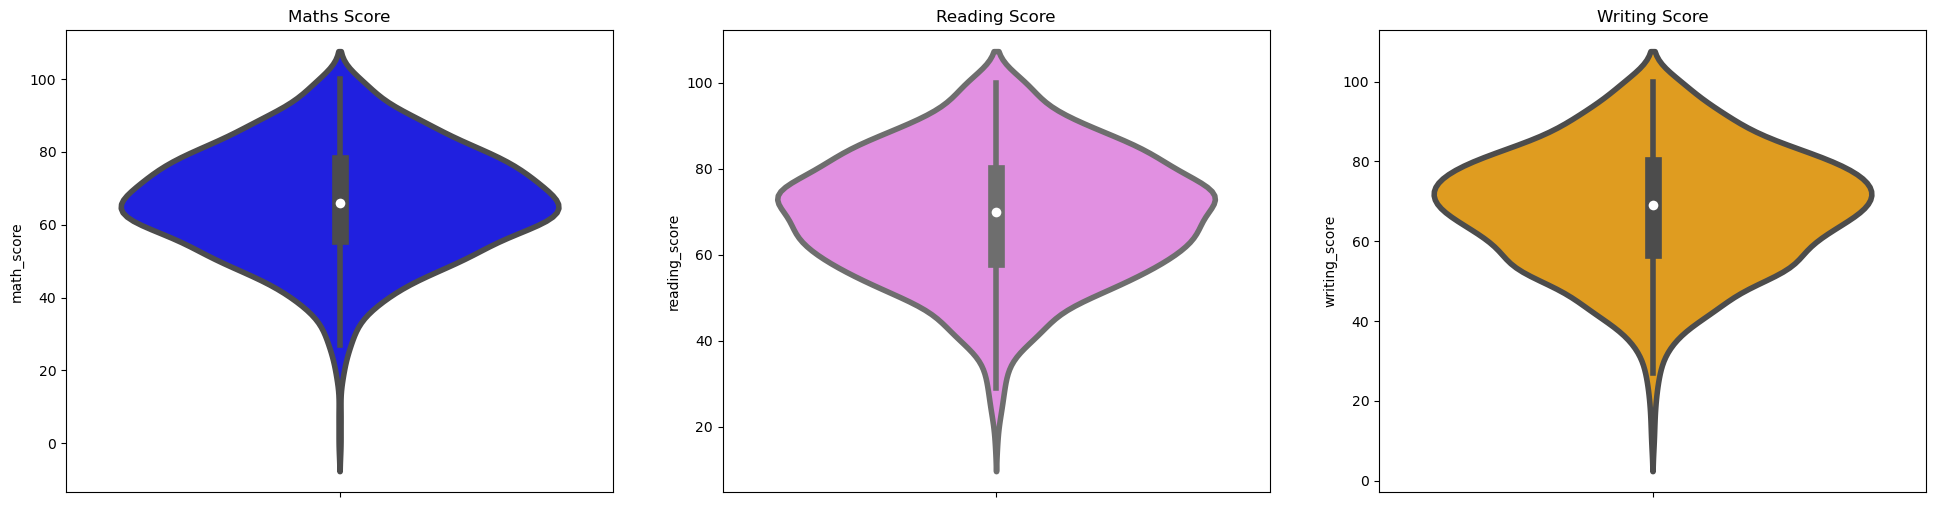

In [107]:
plt.subplots(1,3,figsize=(24,6))
plt.subplot(1, 3, 1)
plt.title('Maths Score')
sns.violinplot(y='math_score',data=df,color='blue',linewidth=4)
plt.subplot(1, 3, 2)
plt.title('Reading Score')
sns.violinplot(y='reading_score',data=df,color='violet',linewidth=4)
plt.subplot(1, 3, 3)
plt.title('Writing Score')
sns.violinplot(y='writing_score',data=df,color='orange',linewidth=4)

#### Insights
- Maths Score --> Most of the students has scored between 60-80
- Reading Score --> Most of the students has scored between 50-80
- Writing Score --> Most of the students has scored between 50-80

### 4.3 Multivariate analysis using Pieplot
- Syntax: matplotlib.pyplot.pie(data, explode=None, labels=None, colors=None, autopct=None, shadow=False)
- Parameters: 
  - data represents the array of data values to be plotted, the fractional area of each slice is represented by data/sum(data). If sum(data)<1, then the data values returns the fractional area directly, thus resulting pie will have empty wedge of size 1-sum(data). 
  - labels is a list of sequence of strings which sets the label of each wedge. 
  - color attribute is used to provide color to the wedges. 
  - autopct is a string used to label the wedge with their numerical value. 
  - shadow is used to create shadow of wedge

Text(0.5, 1.0, 'Test Course')

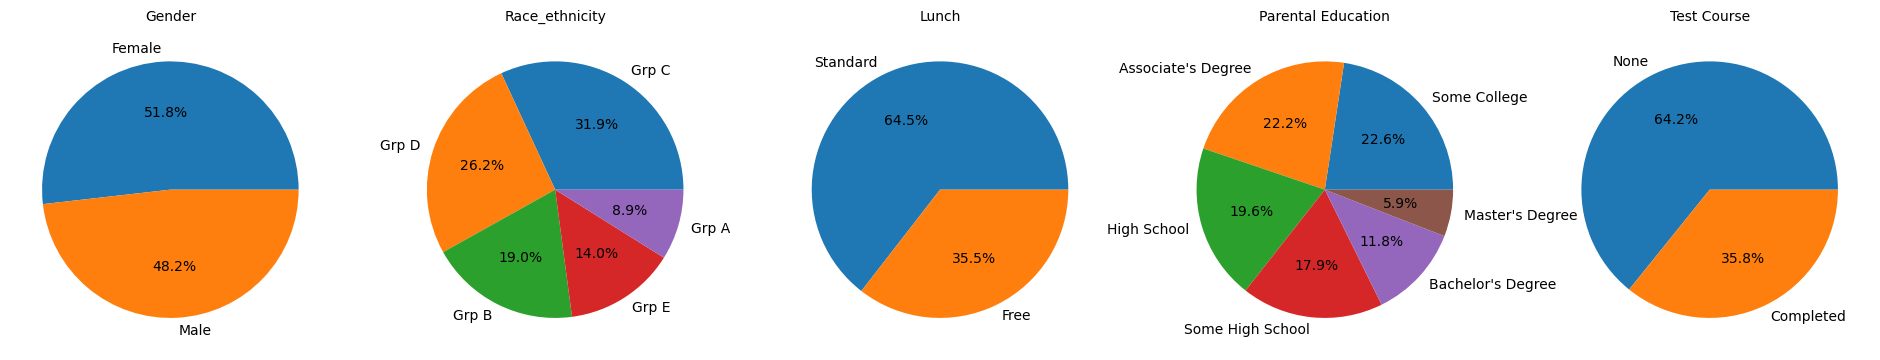

In [146]:
import math

plt.rcParams['figure.figsize'] = (24, 10)

plt.subplot(1, 5, 1)
plt.pie(df['gender'].value_counts(), labels=['Female','Male'],autopct = '%1.1f%%')
plt.title('Gender',fontsize=10)

plt.subplot(1, 5, 2)
plt.pie(df['race_ethnicity'].value_counts(), labels=['Grp C','Grp D','Grp B','Grp E','Grp A'],autopct = '%1.1f%%')
plt.title('Race_ethnicity',fontsize=10)

plt.subplot(1, 5, 3)
plt.pie(df['lunch'].value_counts(), labels=['Standard','Free'],autopct = '%1.1f%%')
plt.title('Lunch',fontsize=10)

plt.subplot(1, 5, 4)
plt.pie(df['parental_level_of_education'].value_counts(), labels=['Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"],autopct = '%1.1f%%')
plt.title('Parental Education',fontsize=10)

plt.subplot(1, 5, 5)
plt.pie(df['test_preparation_course'].value_counts(), labels=['None','Completed'],autopct = '%1.1f%%')
plt.title('Test Course',fontsize=10)

#### Insights
- There is almost equal distribution of male and female students.
- Group C is having greatest nuumber of students
- Maximum number of students prefer standard type of lunch
- Number of students whose parental education type is "Some College" is greater followed closely by "Associate's Degree"
- Maximum number of students have not enrolled in any test preparation course.

In [121]:
df['race_ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

#### 4.4 Feature Wise Visualization
##### 4.4.1 GENDER COLUMN

#### UNIVARIATE ANALYSIS

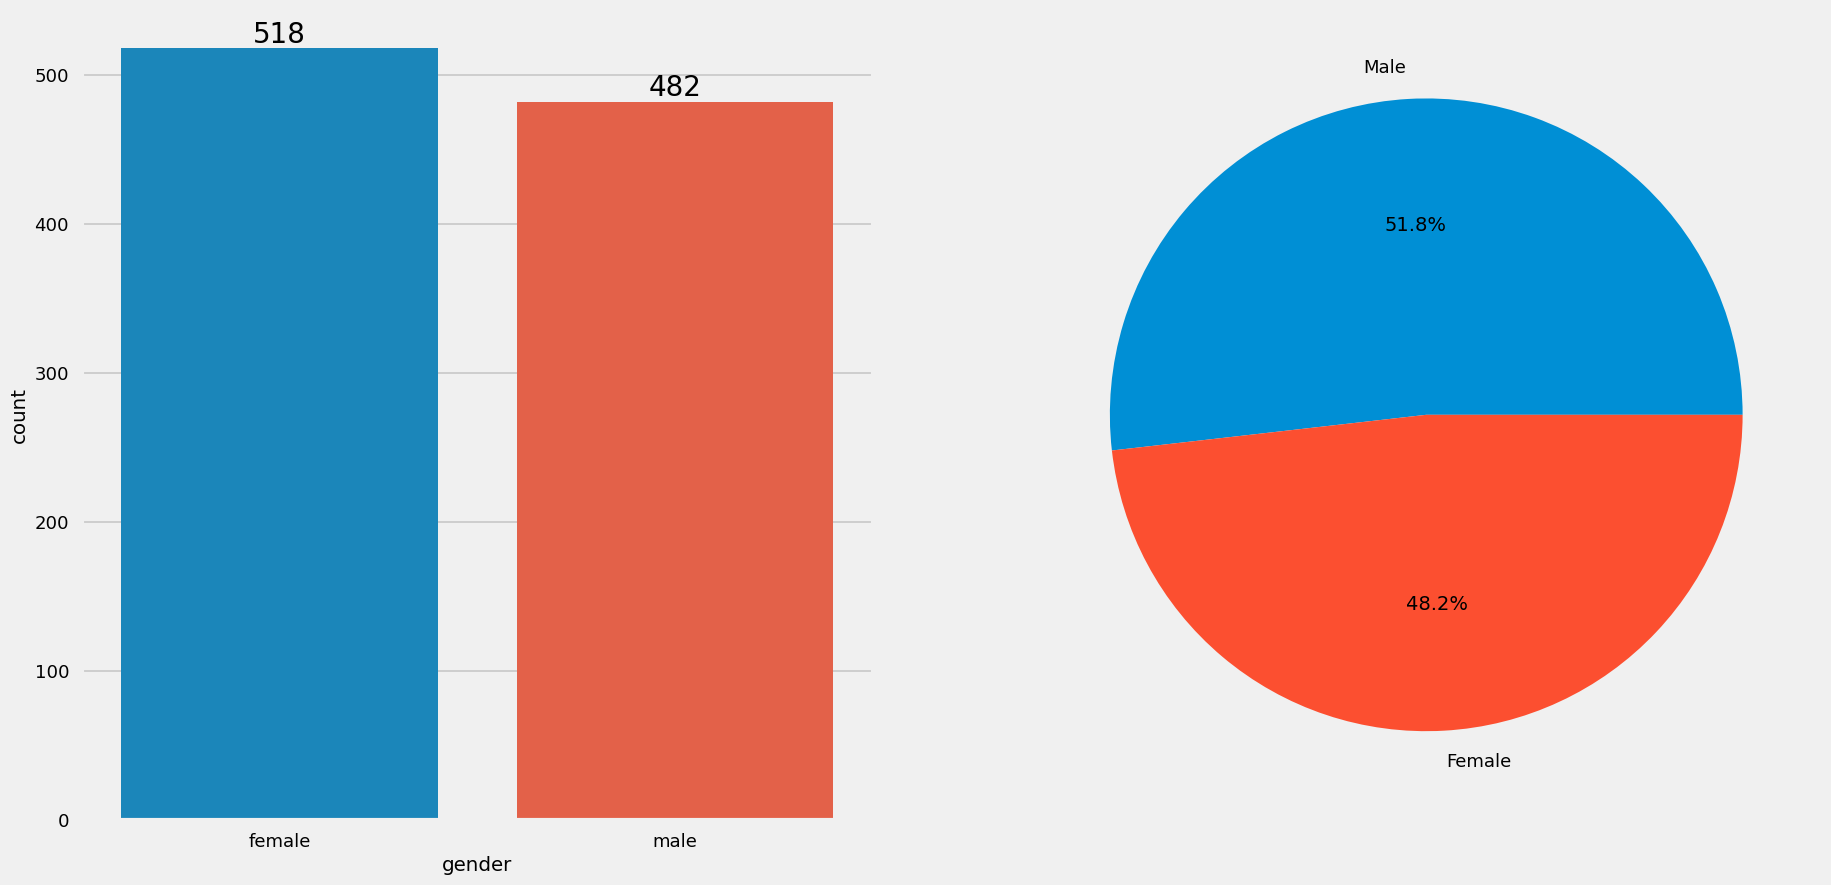

In [198]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%')
plt.show()

#### Insights 
- Gender has balanced data 
  - female students --> 518 (48%) 
  - male students --> 482 (52%) 

#### BIVARIATE ANALYSIS

In [199]:
gen_grp = df.groupby('gender').mean()
gen_grp

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


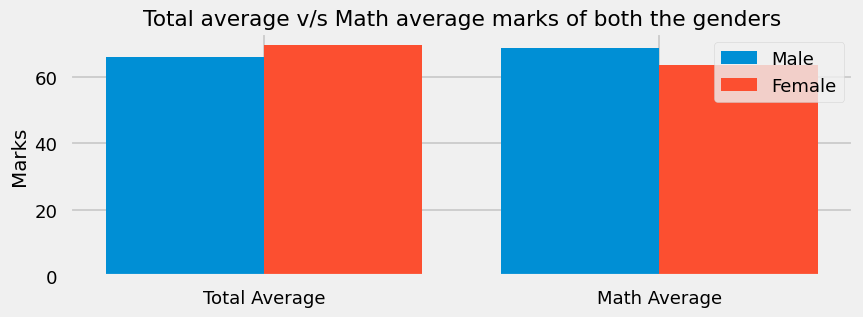

In [205]:
plt.figure(figsize=(9, 3))

X = ['Total Average','Math Average']


female_scores = [gen_grp['average'][0], gen_grp['math_score'][0]]
male_scores = [gen_grp['average'][1], gen_grp['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders")
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- males have scored higher in Maths.

#### 4.4.2 RACE_EHNICITY COLUMN

#### UNIVARIATE ANALYSIS

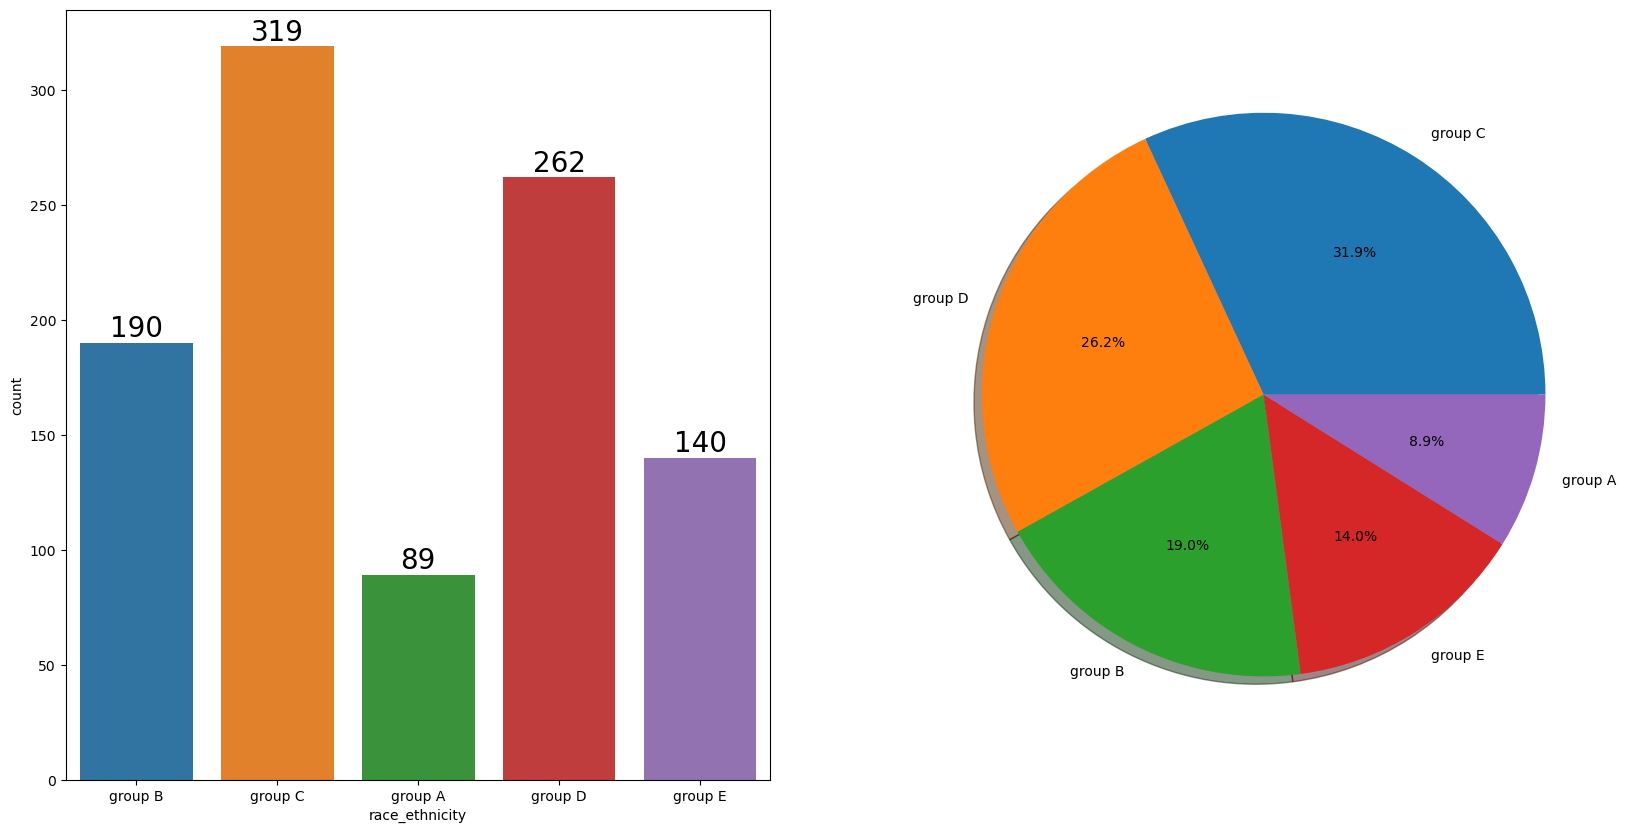

In [147]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student falls under the group of C/D.
- Group A is having lowest number of students.

#### BIVARIATE ANALYSIS

In [206]:
df2 = df.groupby('race_ethnicity')

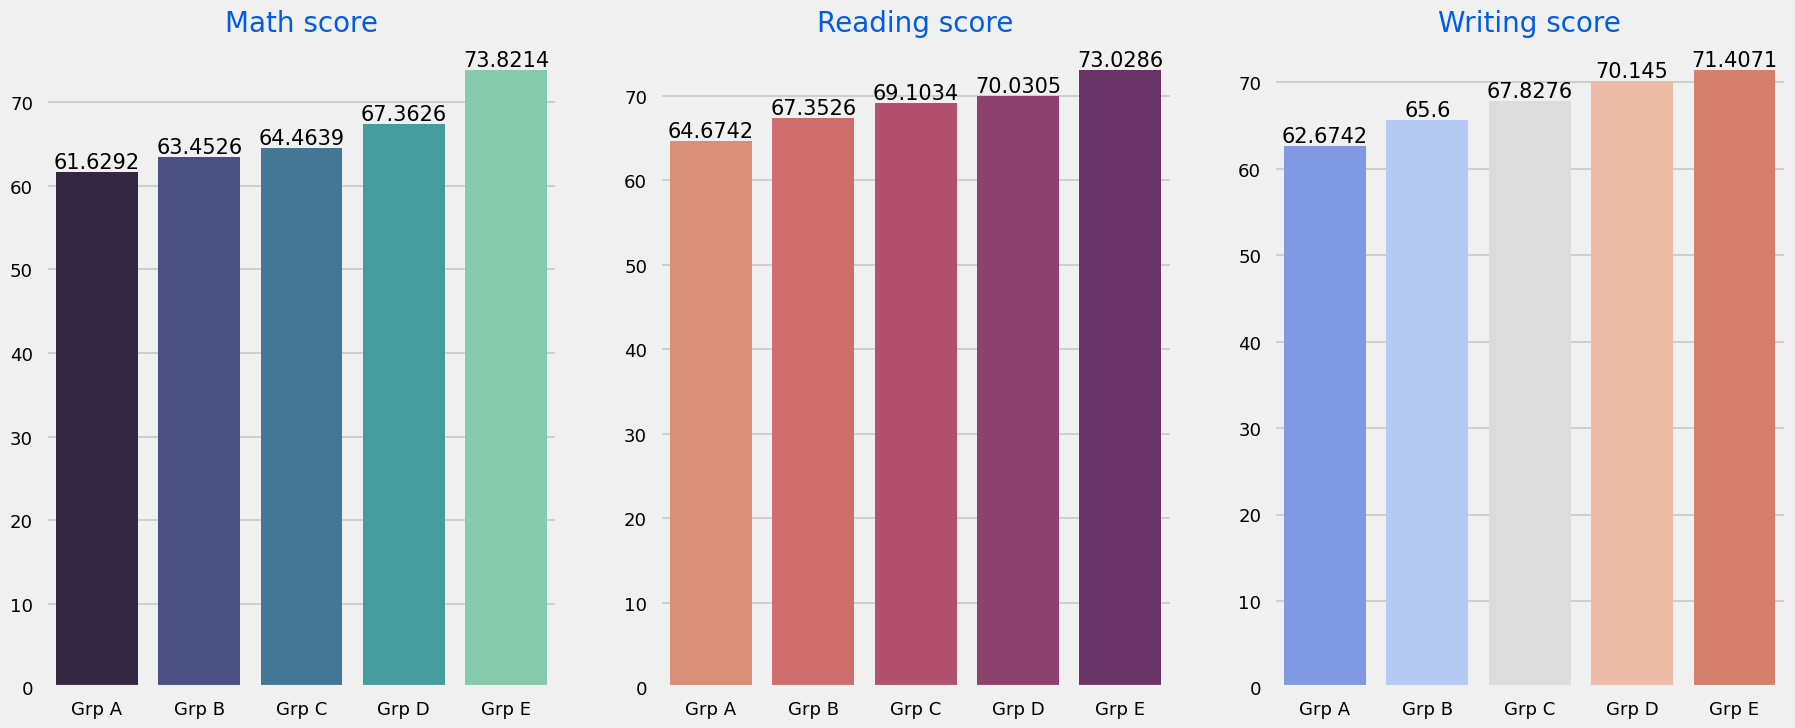

In [207]:
df2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=['Grp A','Grp B','Grp C','Grp D','Grp E'],y=df2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=['Grp A','Grp B','Grp C','Grp D','Grp E'],y=df2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=['Grp A','Grp B','Grp C','Grp D','Grp E'],y=df2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

#### UNIVARIATE ANALYSIS

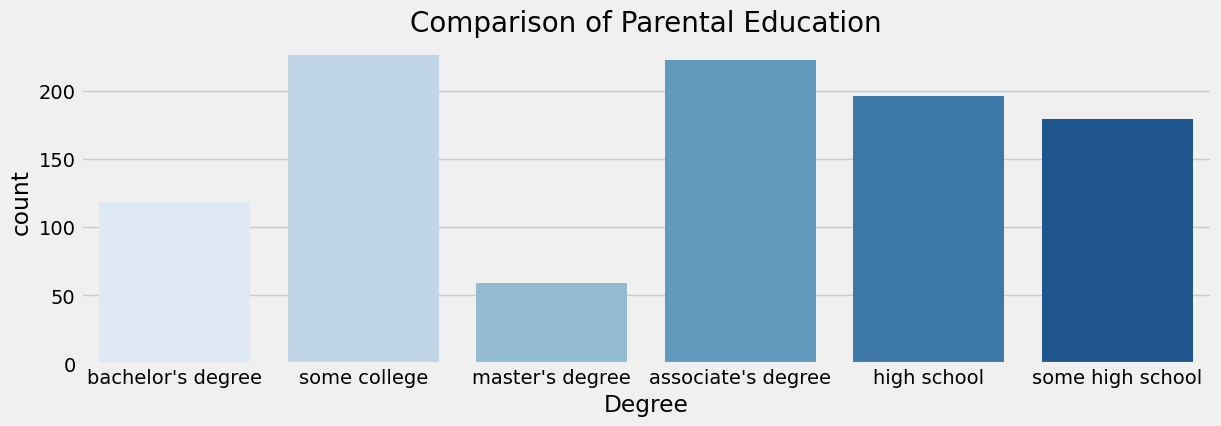

In [189]:
plt.rcParams['figure.figsize'] = (13, 4)
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Most of the parents are from some college.

#### BIVARIATE ANALYSIS

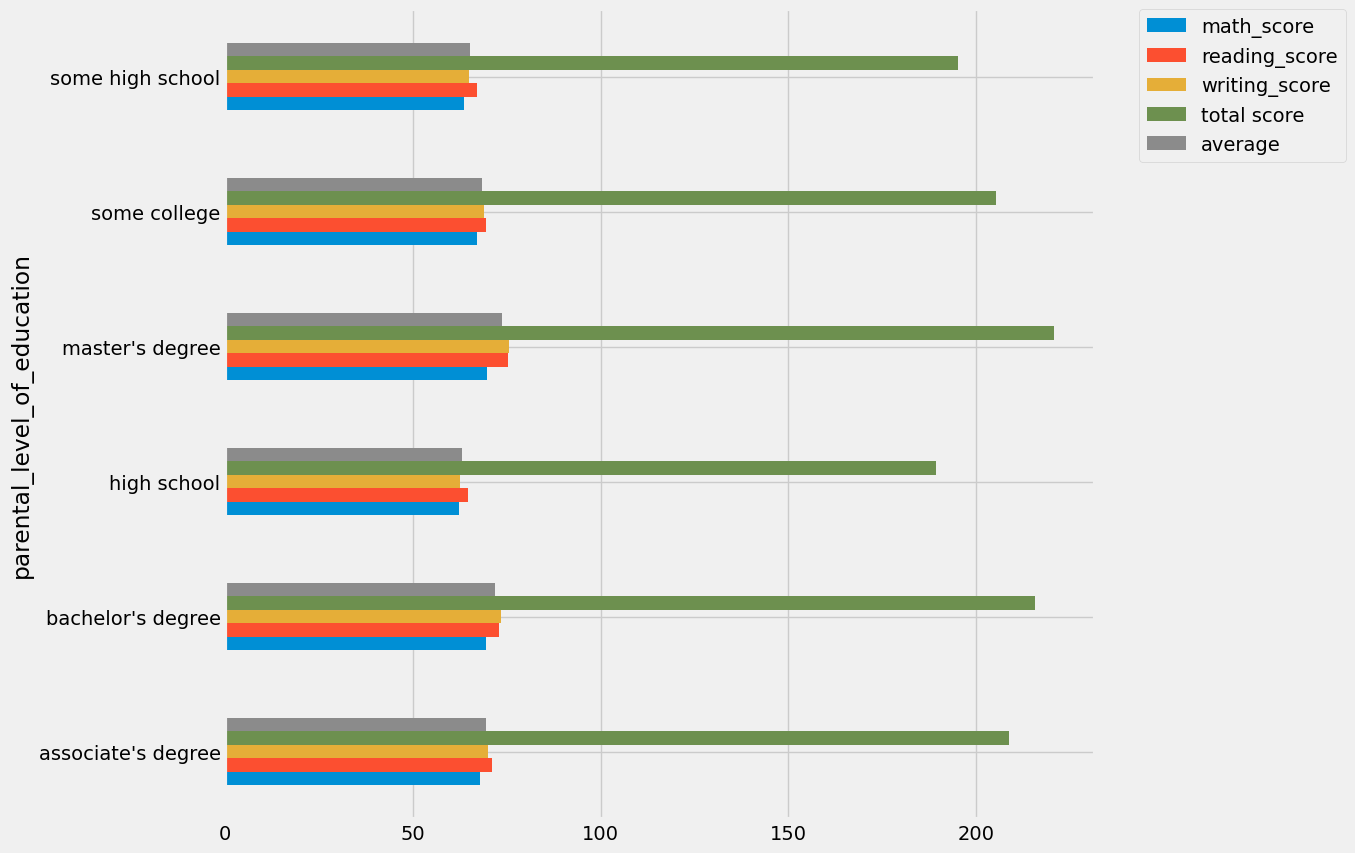

In [190]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 

#### UNIVARIATE ANALYSIS

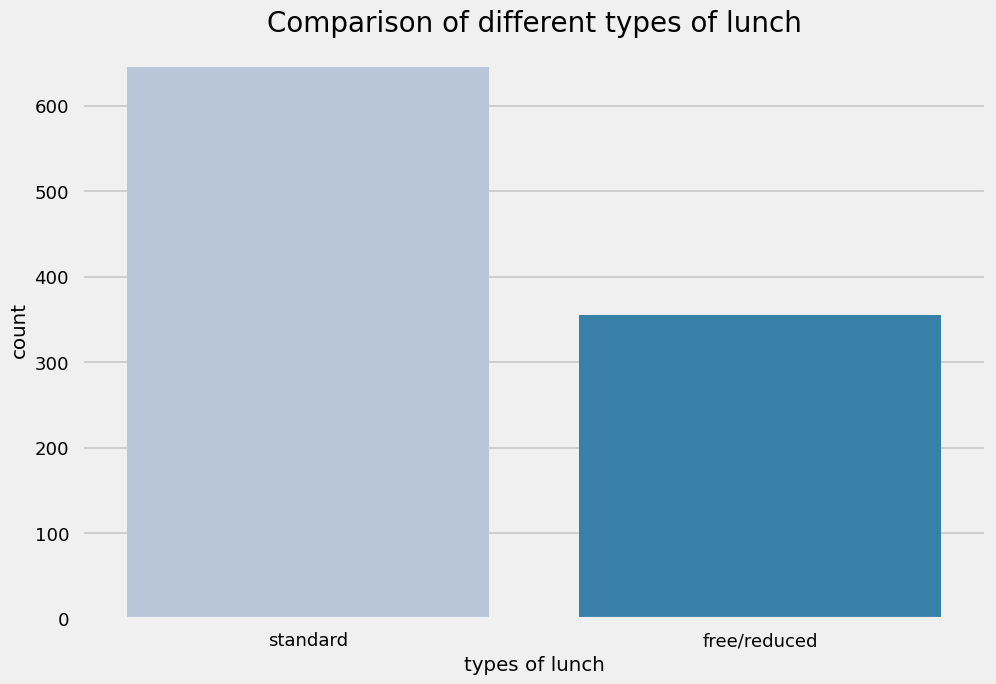

In [210]:
plt.rcParams['figure.figsize'] = (5, 2)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS

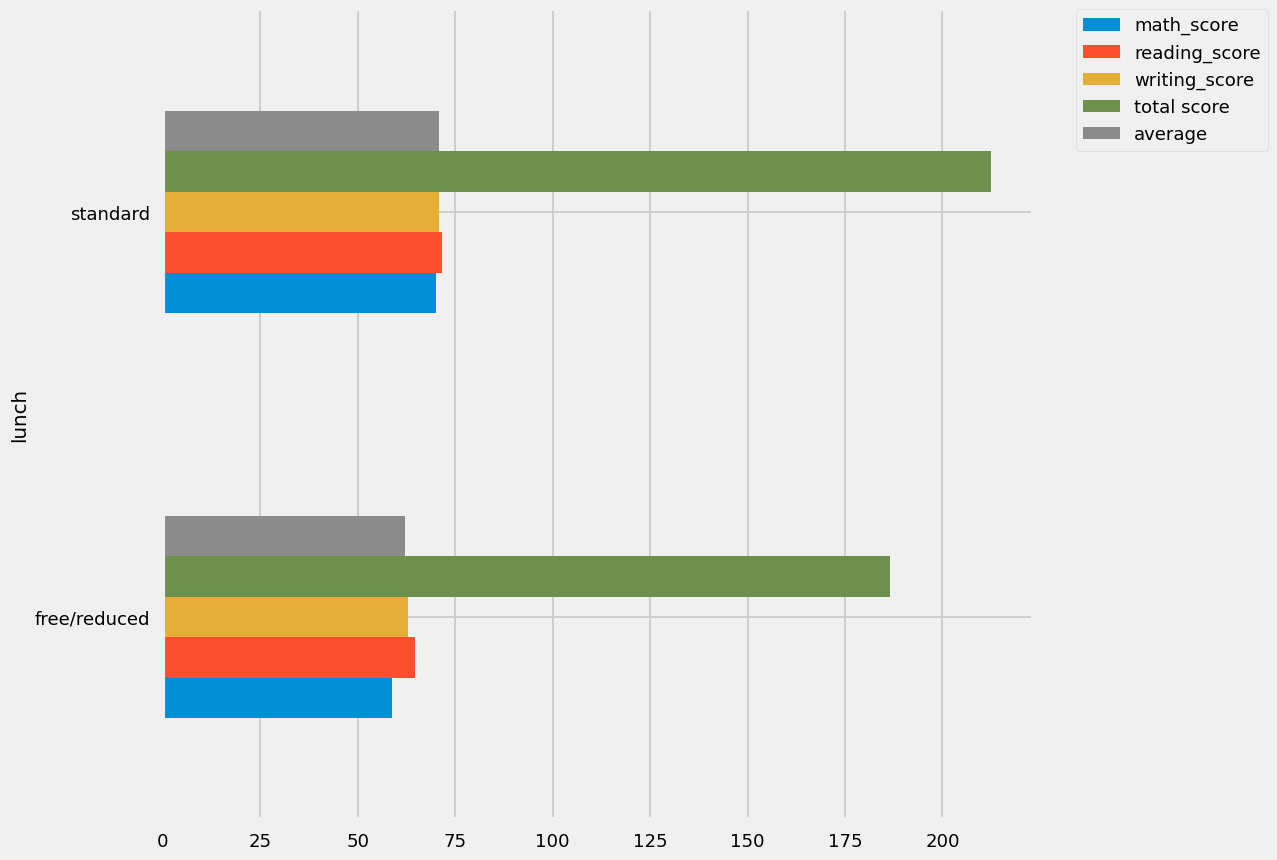

In [212]:
df.groupby('lunch').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- Students who get Standard Lunch perform better than students who got free/reduced lunch

#### 4.4.5 Checking outliers

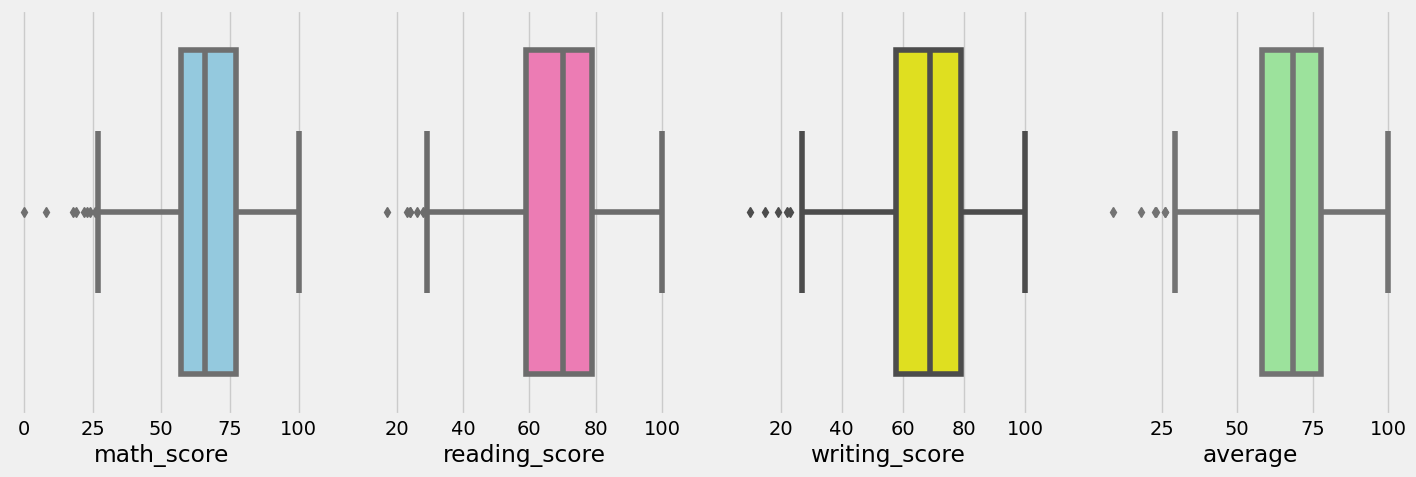

In [191]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.6 MUTIVARIATE ANALYSIS USING PAIRPLOT

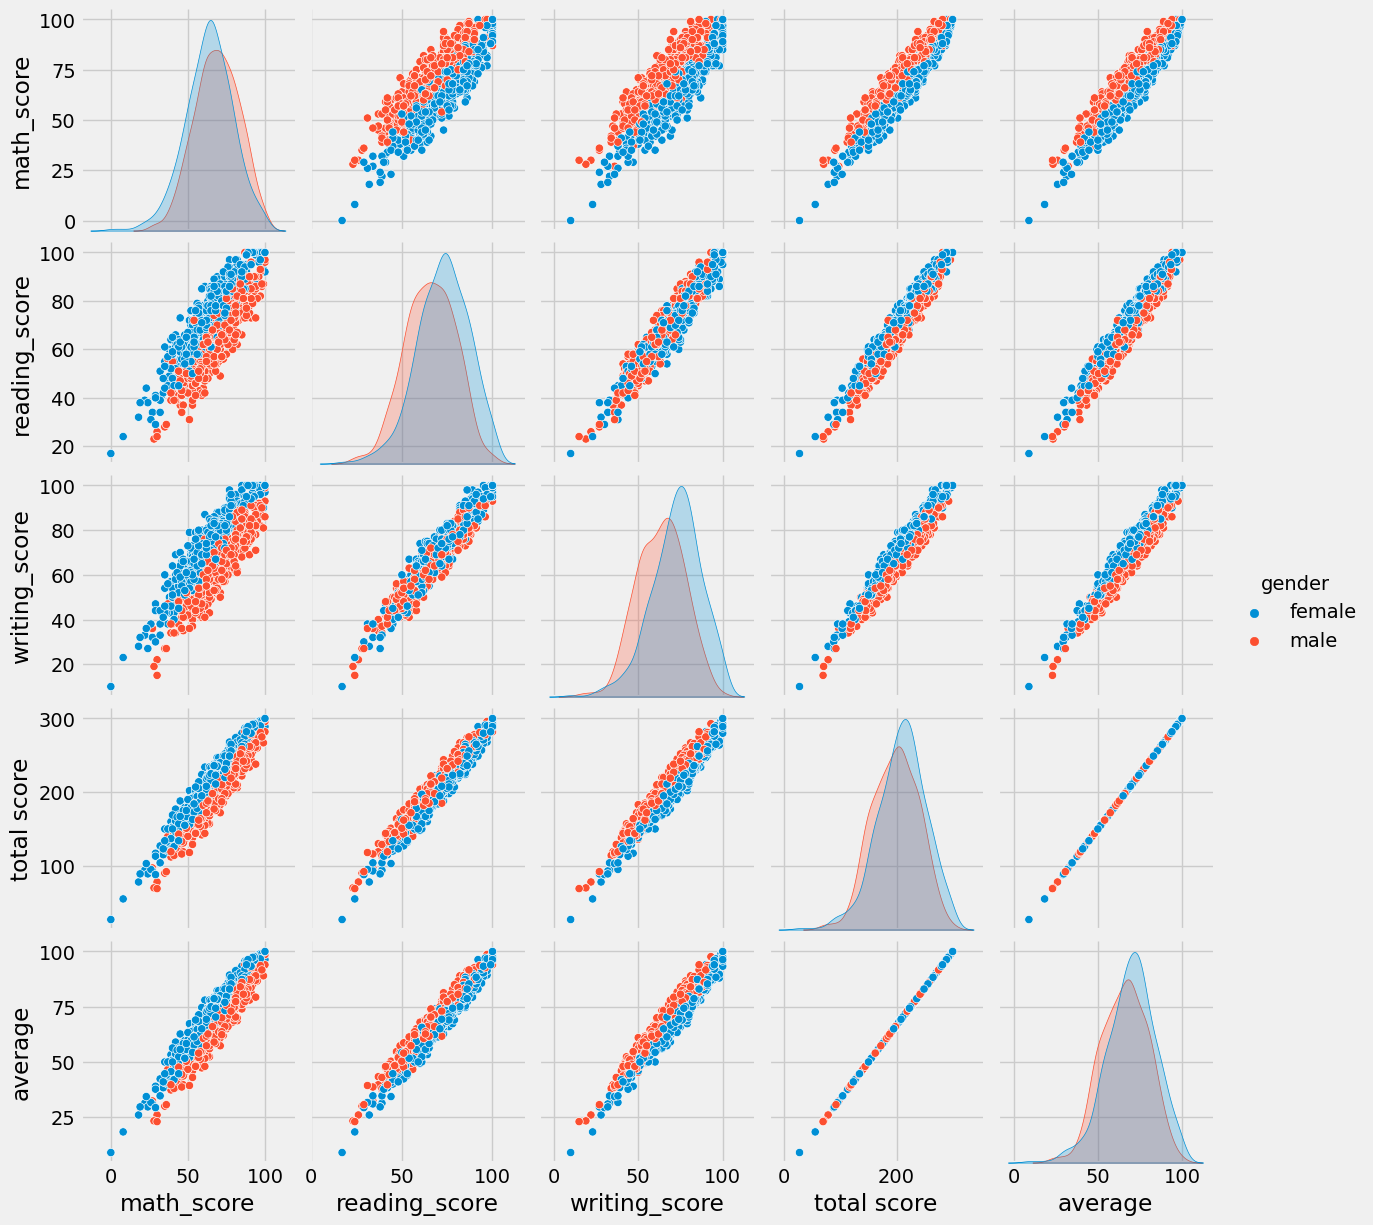

In [192]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plots it is clear that all scores increase linearly with each other.